ShapiroResult(statistic=0.992066037544376, pvalue=0.8259893760395743)
ShapiroResult(statistic=0.990511686390661, pvalue=0.7059354099144997)
ShapiroResult(statistic=0.9801199790690015, pvalue=0.135823022930814)


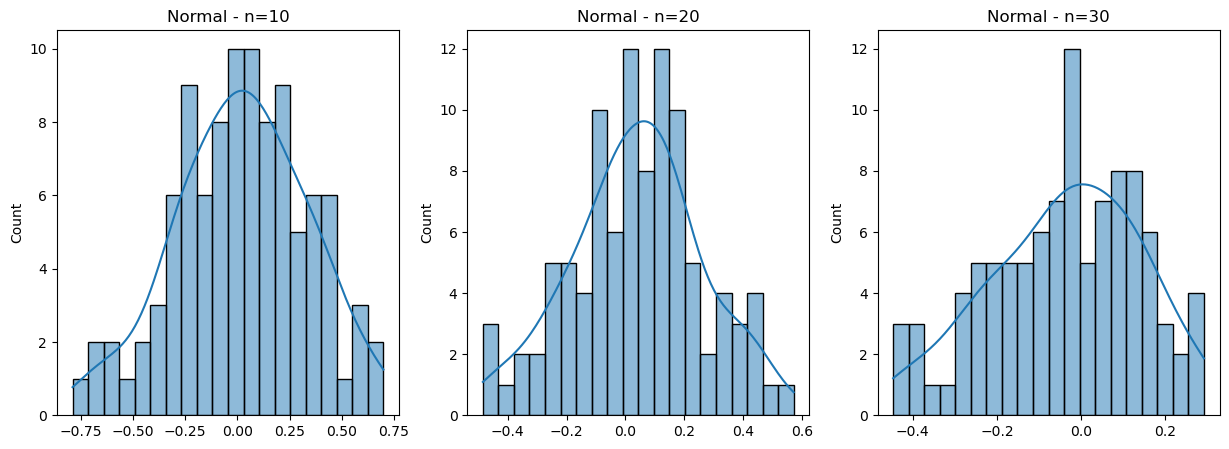

ShapiroResult(statistic=0.9906198534636363, pvalue=0.7146374224667591)
ShapiroResult(statistic=0.9835380089891537, pvalue=0.24801193975158964)
ShapiroResult(statistic=0.9805237867695857, pvalue=0.1459973784514667)


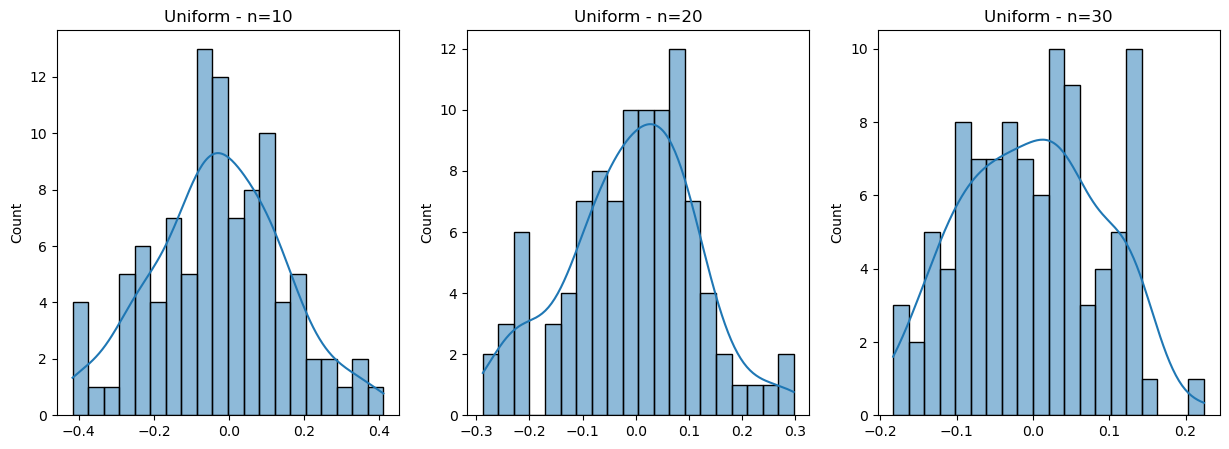

ShapiroResult(statistic=0.9936555095148693, pvalue=0.9242690061909142)
ShapiroResult(statistic=0.982389521593489, pvalue=0.20316591524541766)
ShapiroResult(statistic=0.9943814969528627, pvalue=0.9558063318159415)


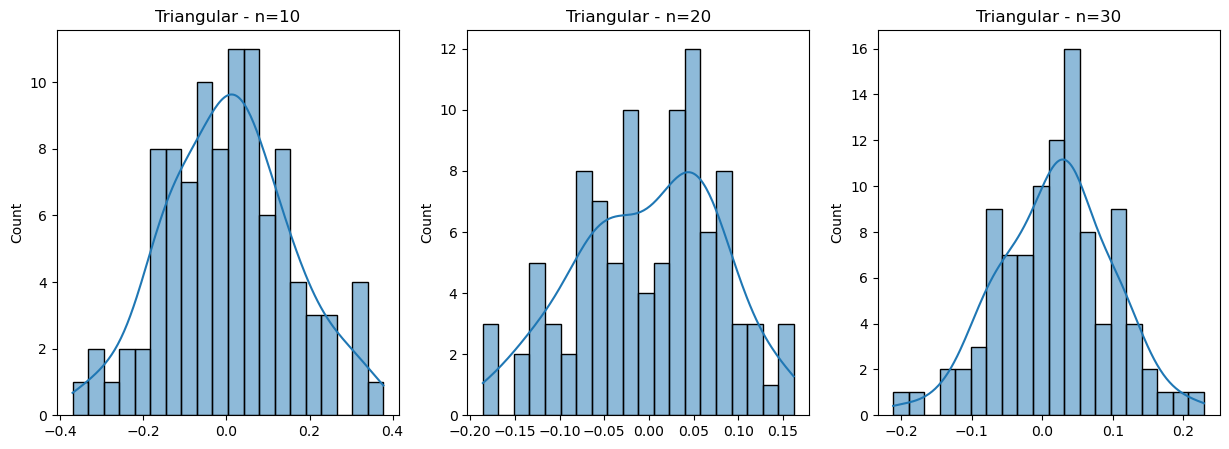

In [1]:
from Probabilites import *

In [2]:
# Generate p-value distributions for Shapiro-Wilk

results = stats.shapiro( generate_samples("uniform", 30) )
teststat = results[0]
pvalue = results[1]

<Axes: ylabel='Count'>

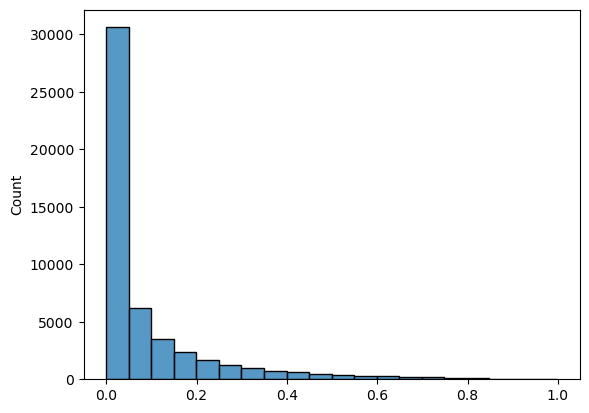

In [3]:
pvalues = []
while (len(pvalues) < 50000):
    #hist = []
    #while len(hist) < 100:
    #    mean=np.mean(bimodial_dist(1,1))
    #    hist.append(mean)    
    #results = stats.shapiro( hist )
    #results = stats.shapiro( generate_samples("normal",30) )
    results = stats.shapiro( generate_samples("weibull",30, **{'shape': 1.5}) )
    #results = stats.shapiro( generate_samples("uniform",30, ) )
    pvalues.append(results[1])

sns.histplot(np.asarray(pvalues), binwidth=0.05)

<Axes: ylabel='Count'>

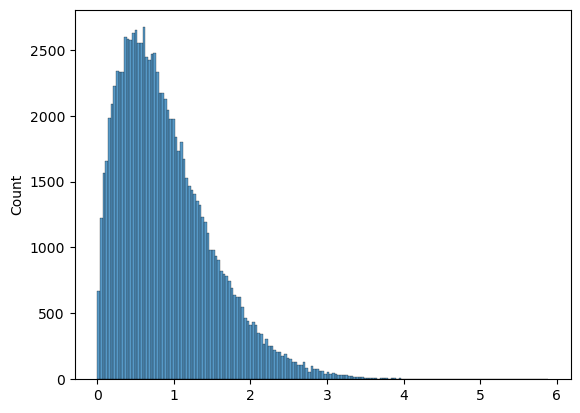

In [4]:
hist = []
#while len(hist) < 10000:
#    mean=np.mean(generate_samples("weibull",1))
#    hist.append(mean)
sns.histplot(generate_samples('weibull', 100000, **{"shape": 1.5}))

In [5]:
results = stats.shapiro( hist )
teststat = results[0]
pvalue = results[1]
print(pvalue)

nan


/tmp/ipykernel_19043/1930358323.py:1: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  results = stats.shapiro( hist )


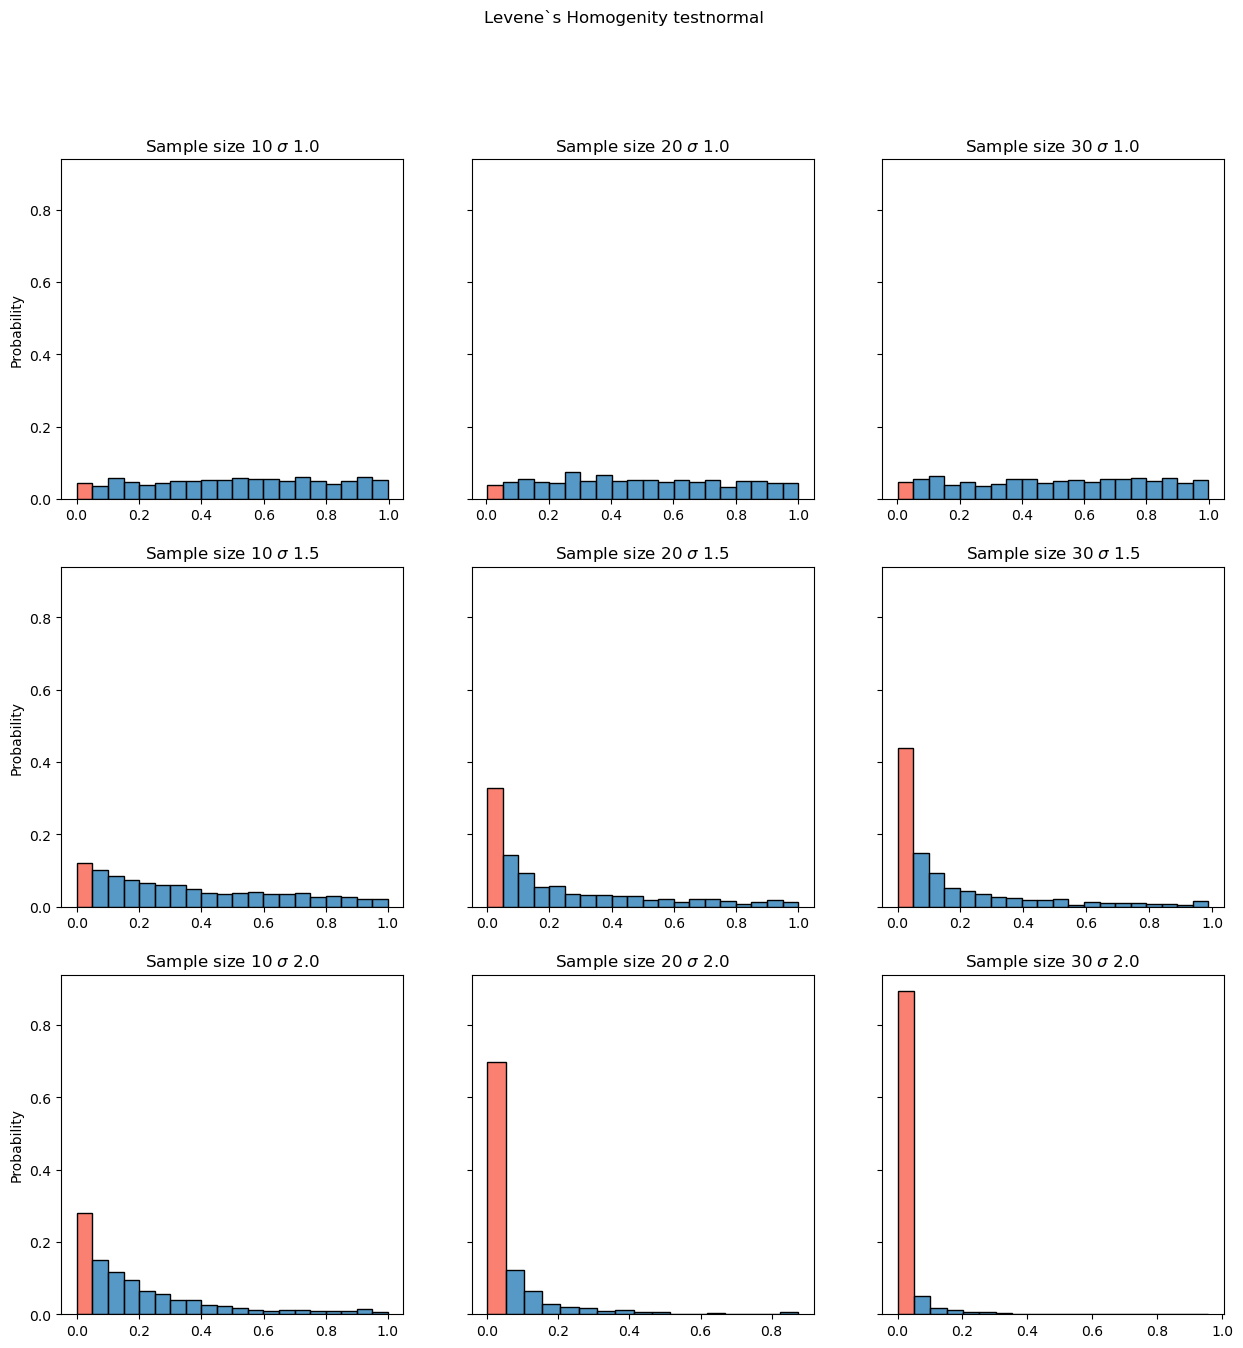

In [6]:
disttype = 'normal'
size = 20
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=True)
fig.suptitle('Levene`s Homogenity test'+disttype)
i=0
j=0
for std in [1.0, 1.5, 2.0]:
    for size in [10, 20, 30]:
        pvalues = []
        while len(pvalues)<1000:
            results = stats.levene(generate_samples(disttype,size), generate_samples(disttype, size, **{'scale':std, 'loc':2}))
            pvalues.append(results[1])
        snsplot = sns.histplot(pvalues, stat='probability', binwidth=0.05, ax=axes[i][j]) #, hue=r'$\sigma$')
        snsplot.patches[0].set_facecolor('salmon')
        snsplot.set_title('Sample size '+str(size) +' '+r'$\sigma$ '+str(std))
        j=j+1
    i=i+1
    j=0
fig = snsplot.get_figure()
fig.savefig('test.png')

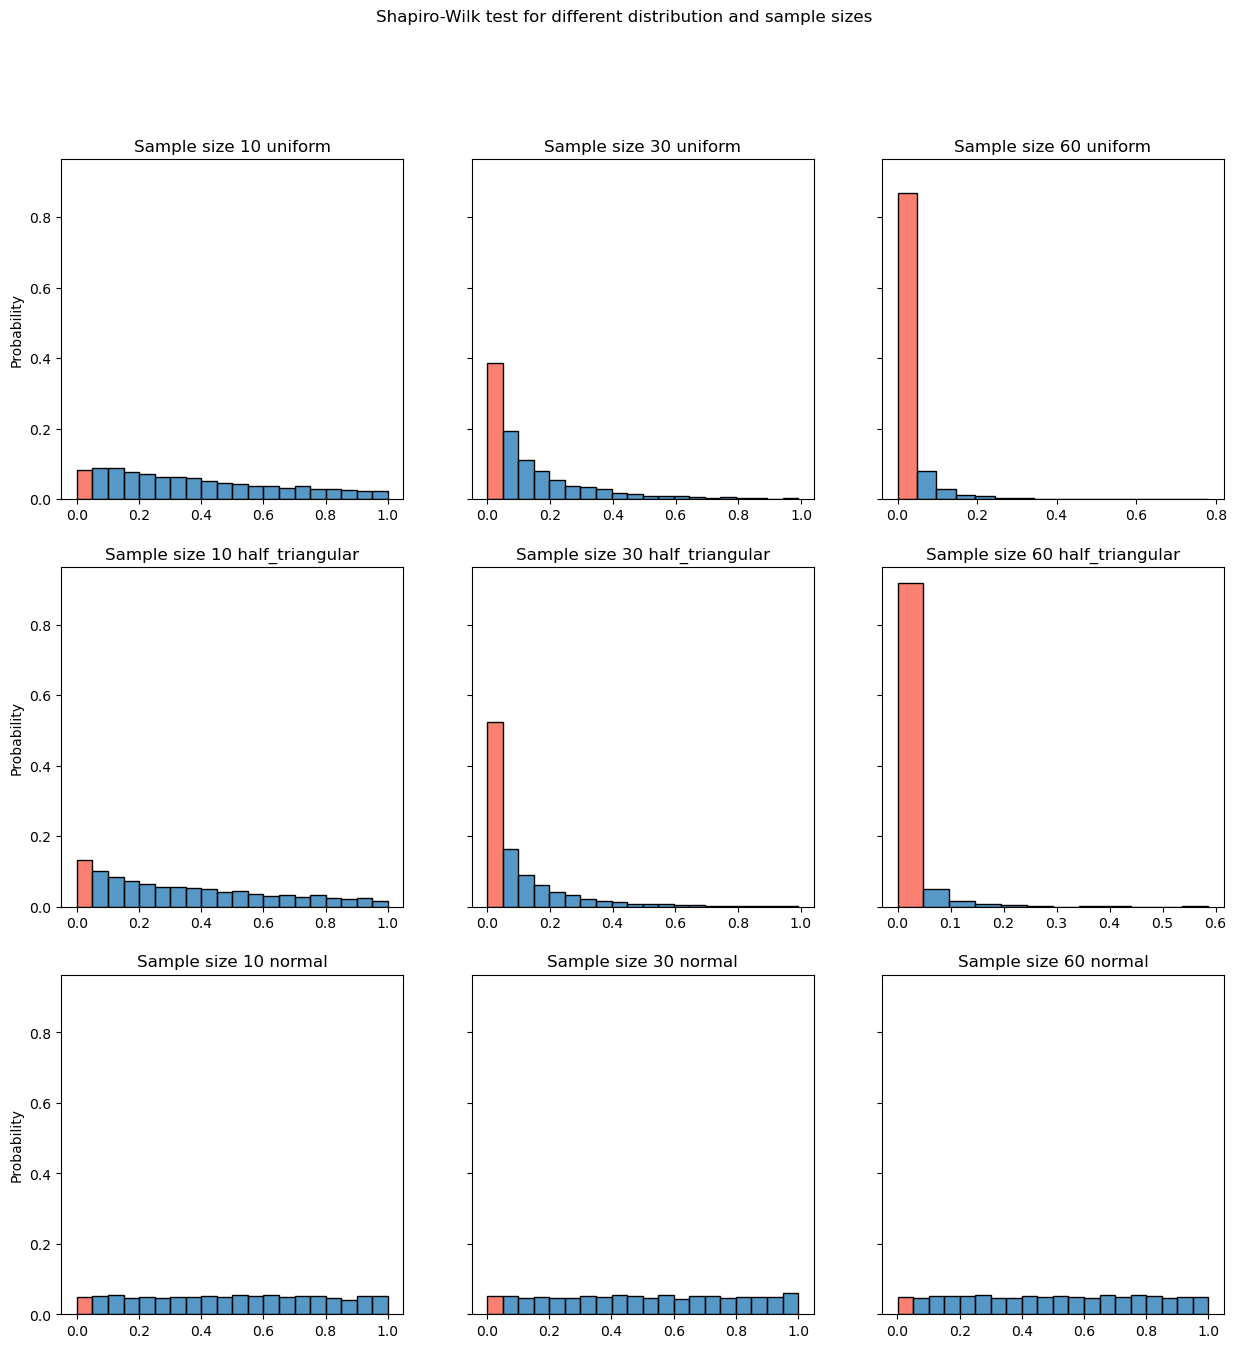

In [7]:
disttype = ['uniform','half_triangular','normal']
size = 20
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=True)
fig.suptitle('Shapiro-Wilk test for different distribution and sample sizes')
i=0
j=0
for dist in disttype:
    for size in [10, 30, 60]:
        pvalues = []
        while len(pvalues)<5000:
            results = stats.shapiro(generate_samples(dist,size))
            pvalues.append(results[1])
        snsplot = sns.histplot(pvalues, stat='probability', binwidth=0.05, ax=axes[i][j]) #, hue=r'$\sigma$')
        snsplot.patches[0].set_facecolor('salmon')
        snsplot.set_title('Sample size '+str(size) +' '+dist)
        j=j+1
    i=i+1
    j=0
fig = snsplot.get_figure()
fig.savefig('test.png')

In [167]:
data = np.append(generate_samples('normal', 70000, **{'scale': 1, 'loc':0}), generate_samples('normal', 30000, **{'scale': 2, 'loc':2}))
data = data.reshape(-1,1)
x=data
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0).fit(data)
#print(gm.sample(1000))

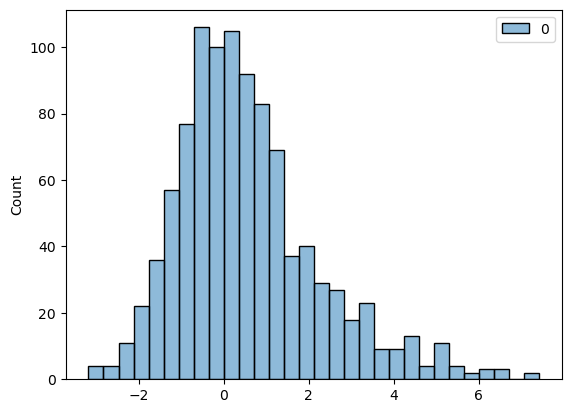

In [168]:
snsplot = sns.histplot(gm.sample(1000)[0]) #, hue=r'$\sigma$')

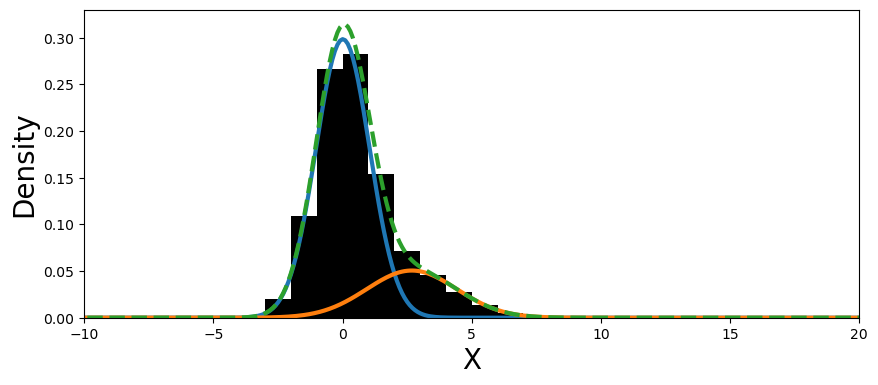

In [172]:
# plot the evolution of BIC/AIC with the number of components
fig = plt.figure(figsize=(10, 4))

from sklearn.mixture import GaussianMixture as GMM
from scipy.stats import norm

# create GMM model object
gmm = GMM(n_components = 2, max_iter=5000, covariance_type = 'full')

# find useful parameters
mean = gmm.fit(x).means_  
covs  = gmm.fit(x).covariances_
weights = gmm.fit(x).weights_

# create necessary things to plot
x_axis = np.arange(-20, 30, 0.1)
y_axis0 = norm.pdf(x_axis, float(mean[0][0]), np.sqrt(float(covs[0][0][0])))*weights[0] # 1st gaussian
y_axis1 = norm.pdf(x_axis, float(mean[1][0]), np.sqrt(float(covs[1][0][0])))*weights[1] # 2nd gaussian

ax = fig.add_subplot(1,1,1)
# Plot 2
plt.hist(x, density=True, color='black', bins=np.arange(-100, 100, 1))
plt.plot(x_axis, y_axis0, lw=3, c='C0')
plt.plot(x_axis, y_axis1, lw=3, c='C1')
plt.plot(x_axis, y_axis0+y_axis1, lw=3, c='C2', ls='dashed')
plt.xlim(-10, 20)
#plt.ylim(0.0, 2.0)
plt.xlabel(r"X", fontsize=20)
plt.ylabel(r"Density", fontsize=20)

plt.subplots_adjust(wspace=0.3)
plt.show()
plt.close('all')

<Axes: ylabel='Probability'>

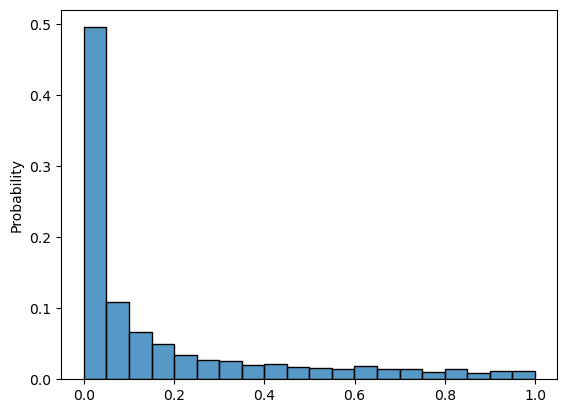

In [173]:
pvalues = []
while (len(pvalues) < 5000):
    #hist = []
    #while len(hist) < 100:
    #    mean=np.mean(bimodial_dist(1,1))
    #    hist.append(mean)    
    #results = stats.shapiro( hist )
    #results = stats.shapiro( generate_samples("normal",30) )
    results = stats.shapiro( gmm.sample(30)[0].reshape(1,-1)[0])
    #results = stats.shapiro( generate_samples("uniform",30, ) )
    pvalues.append(results[1])
#print(pvalues)
sns.histplot(np.asarray(pvalues),stat='probability', binwidth=0.05)


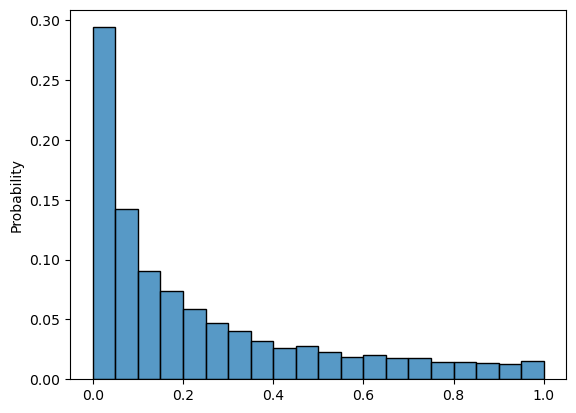

In [179]:
pvalues = []
while len(pvalues) < 10000:
    results = stats.ttest_ind(gmm.sample(25)[0].reshape(1,-1)[0], generate_samples('normal', 25, **{'scale': 1, 'loc':-0.0}), equal_var=False)
    #results = stats.ttest_ind(generate_samples('normal', 10, **{'scale': 1, 'loc':0}), generate_samples('normal', 10, **{'scale': 2, 'loc':-0.5}), equal_var=False)
    pvalues.append(results[1])
#print(pvalues)
sns.histplot(np.asarray(pvalues),stat='probability', binwidth=0.05)
snsplot.patches[0].set_facecolor('salmon')

In [150]:
print(gmm.sample(10)[0].reshape(1,-1)[0])
print(generate_samples('normal', 10, **{'scale': 1, 'loc':-0.5}))

[ 1.47601285  0.71077635  2.12723272 -2.19706461 -0.62079611 -0.17682807
  1.41901918 -0.68825411  2.54014212  2.69740838]
[-0.19577535 -0.69761179 -1.21390788  0.32397695 -0.0434576   1.43896777
 -0.332754    0.40545699 -1.12926736 -1.42953418]


In [155]:
results = stats.ttest_ind(gmm.sample(10)[0].reshape(1,-1)[0], generate_samples('normal', 10, **{'scale': 1, 'loc':-0.5}), equal_var=False)
print(results)

TtestResult(statistic=0.5548292524127969, pvalue=0.586039689565452, df=17.485024768378608)


In [148]:
stats.ttest_ind(generate_samples('normal', 10, **{'scale': 1, 'loc':0}), generate_samples('normal', 10, **{'scale': 2, 'loc':-0.5}), equal_var=True)

TtestResult(statistic=1.1530994457144146, pvalue=0.26395273310936435, df=18.0)